In [7]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output


In [9]:
env = gym.make("FrozenLake-v1")

# is_slippery turn off the randomness and much easier to learn
#his allows env.render() to work and return image frames correctly for animation.

In [58]:
import gym
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os

# Fix numpy bool issue
np.bool8 = np.bool_

def visualize_agent_path(q_table, save_path="frozenlake_agent.gif", fps=1):
    env = gym.make("FrozenLake-v1", is_slippery=True)
    grid_desc = env.unwrapped.desc.astype("U1")

    colors = {
        "S": "lightblue",
        "F": "white",
        "H": "black",
        "G": "green",
        "A": "red"
    }

    def draw(state, title=""):
        fig, ax = plt.subplots()
        for y in range(4):
            for x in range(4):
                tile = grid_desc[y][x]
                color = colors.get(tile, "gray")
                ax.add_patch(plt.Rectangle((x, 3 - y), 1, 1, color=color, edgecolor='black'))
        
        row, col = divmod(state, 4)
        ax.add_patch(plt.Circle((col + 0.5, 3 - row + 0.5), 0.3, color='blue'))
        ax.set_title(title)
        ax.set_xlim(0, 4)
        ax.set_ylim(0, 4)
        ax.set_aspect('equal')
        ax.axis('off')

        # ✅ Use buffer_rgba() instead of tostring_rgb()
        fig.canvas.draw()
        img = np.asarray(fig.canvas.buffer_rgba()).copy()
        plt.close(fig)
        return img

    frames = []
    state, _ = env.reset()
    state = int(state)
    frames.append(draw(state, "Start"))
    done = False
    step = 0

    while not done and step < 100:
        action = np.argmax(q_table[state])
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = int(new_state)
        step += 1
        frames.append(draw(state, f"Step {step}"))

    frames.append(draw(state, "Goal!" if reward == 1 else "Hole!"))

    imageio.mimsave(save_path, frames, fps=fps)
    print(f"✅ Saved animation to {save_path}")







In [59]:
action_space_size=env.action_space.n
state_space_size=env.observation_space.n

# intiliza the q-table as 0
q_table=np.zeros((state_space_size,action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [79]:
num_episodes = 20000 # total no of ep our agent will ply during the training
max_steps_per_episodes = 100# max no.of steps within a single ep
learning_rate = 0.7  # alpha
discount_rate = 0.99  # gamma
exploration_rate = 1.0  # epsilon
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.0001

rewards_all_ep = []
# Q-learning algorithm
for episode in range(num_episodes):
    state, _ = env.reset() # reset the env and get the initial state
    state = int(state)
    done = False# done keep track of whether the ep is done or not
    rewards_current_ep = 0# rewards for the current ep

    for step in range(max_steps_per_episodes): # loop through each time step within an ep
         # exploriation-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)# determine whether the agent will explore or exploit the env
        if exploration_rate_threshold > exploration_rate:  # agent will exploit
            action = np.argmax(q_table[state, :]) # choose action that has highest qvalue in q-table for given state
        else:
            action = env.action_space.sample() # agent will explore and choose random action
        
         # sample-selects one ramdon action from the set of all possible action

        new_state, reward, terminated, truncated, info = env.step(action)# take the action and get the new state, reward, and done flag
        done = terminated or truncated
        new_state = int(new_state)

        # Q-learning update
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_ep += reward

        if done:
            break

    # After episode ends
    # decay the exploration rate - once the ep finish we update this
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * \
        np.exp(-exploration_decay_rate * episode)

    rewards_all_ep.append(rewards_current_ep)

# Average reward per 1000 episodes
rewards_per_thousand_ep = np.array_split(np.array(rewards_all_ep), num_episodes / 1000)
count = 1000
print("**********Average Reward Per 1000 Episodes**********\n")
for r in rewards_per_thousand_ep:
    print(count, ";", str(sum(r) / 1000))
    count += 1000

print("\n **********Q-table**********\n")
print(q_table)




**********Average Reward Per 1000 Episodes**********

1000 ; 0.016
2000 ; 0.057
3000 ; 0.108
4000 ; 0.174
5000 ; 0.264
6000 ; 0.302
7000 ; 0.389
8000 ; 0.434
9000 ; 0.496
10000 ; 0.563
11000 ; 0.611
12000 ; 0.634
13000 ; 0.693
14000 ; 0.692
15000 ; 0.734
16000 ; 0.782
17000 ; 0.769
18000 ; 0.807
19000 ; 0.827
20000 ; 0.859

 **********Q-table**********

[[9.41480149e-001 9.50990050e-001 9.50990050e-001 9.41480149e-001]
 [9.41480149e-001 0.00000000e+000 9.60596010e-001 9.50990050e-001]
 [9.50990050e-001 9.70299000e-001 9.50990050e-001 9.60596010e-001]
 [9.60596010e-001 1.73300522e-215 9.50990050e-001 9.50990050e-001]
 [9.50990050e-001 9.60596010e-001 0.00000000e+000 9.41480149e-001]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 9.80100000e-001 0.00000000e+000 9.60596010e-001]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [9.60596010e-001 0.00000000e+000 9.70299000e-001 9.50990050e-001]
 [9.60596010e-001 9.80100000e-001 9.80100

The step() function:

Executes the action in the environment.

Returns 4 values:

Component	What It Represents:

new_state	The next state the agent ends up in after taking the action.

reward	The immediate reward received for that action.

done	A boolean — True if the episode is over (agent reached goal or failed).

info	Extra diagnostic info (optional, often unused in basic examples).

In [64]:
visualize_agent_path(q_table)





/var/folders/s3/_3bdsl3n02d83vsm4vx50tww0000gn/T/ipykernel_88399/3740466317.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x, 3 - y), 1, 1, color=color, edgecolor='black'))


✅ Saved animation to frozenlake_agent.gif


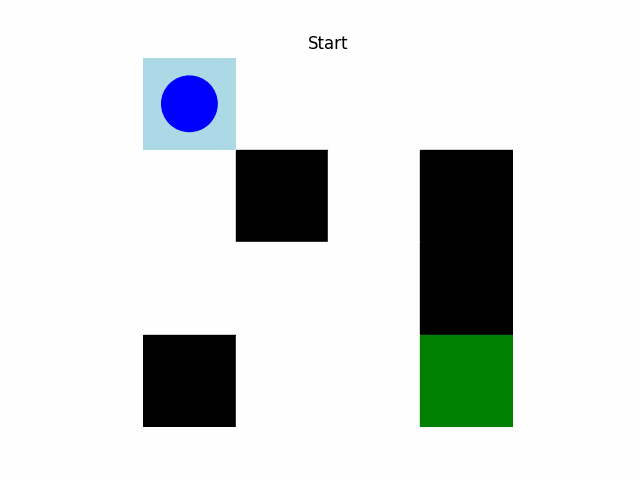

In [66]:
from IPython.display import Image
Image(filename="frozenlake_agent.gif")


In [81]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed=None):
    episode_rewards = []

    for episode in range(n_eval_episodes):
        if seed:
            state, _ = env.reset(seed=seed[episode])
        else:
            state, _ = env.reset()
        state = int(state)
        total_rewards_ep = 0

        for step in range(max_steps):
            action = np.argmax(Q[state])  # choose best action from Q-table
            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            new_state = int(new_state)
            total_rewards_ep += reward
            state = new_state

            if done:
                break

        episode_rewards.append(total_rewards_ep)

    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)
    return mean_reward, std_reward




In [82]:
env = gym.make("FrozenLake-v1", is_slippery=False)
mean, std = evaluate_agent(env, max_steps=100, n_eval_episodes=100, Q=q_table)
print(f"✅ Evaluation result: mean_reward = {mean:.2f}, std = {std:.2f}")



✅ Evaluation result: mean_reward = 1.00, std = 0.00
